In [14]:
import import_ipynb
import functions as fn
import numpy as np
from lstmcontroller import LstmController
from pidcontroller import PidController
import matplotlib.pyplot as plt
import imageio
import tclab

In [5]:
Kc   = 6.0
tauI = 75.0 # sec
tauD = 0.0  # sec
out_min = 0
out_max = 100
pid = PidController(Kc, Kc / tauI, -Kc * tauD, out_min, out_max)
lstm = LstmController.load_model('pid_emulate.h5', 'model_params.pkl')

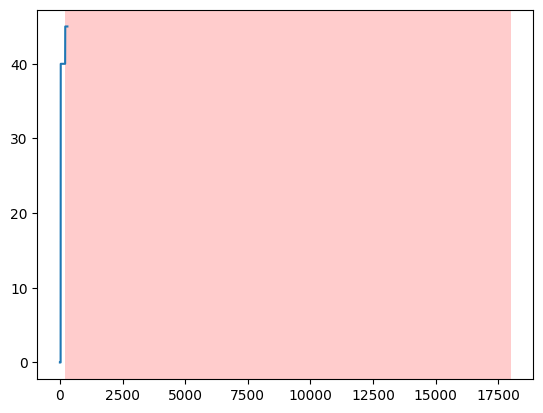

In [10]:
run_time = 5.0 * 60
start_anom = int(0.7 * run_time)
Tsp = fn.generate_temperature_setpoints(lstm.window + 15, 23.67, 240, 600, 30, 70, start_anom)
Tsp = np.append(Tsp, fn.generate_temperature_setpoints(0, Tsp[-1], 240, 600, 30, 50, int(run_time - start_anom)))
plt.plot(Tsp)
plt.axvspan(start_anom,60 * run_time,facecolor='r',alpha=0.2);

TCLab version 0.4.9
Simulated TCLab
1/1 [==============================] - 0s 14ms/step
   0.0   0.00  20.63   0.00   0.00
1/1 [==============================] - 0s 14ms/step
   3.3   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
   5.0   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 13ms/step
   6.1   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
   7.0   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 13ms/step
   8.0   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
   9.2   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 15ms/step
  10.2   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  11.1   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  12.0   0.00  20.95   0.00   0.00
1/1 [==============================] - 0s 13ms/step
  13.2   0.00  20.95   0.00   0.00
1/1 [==

1/1 [==============================] - 0s 14ms/step
 105.0  40.00  36.42  52.16  73.91
1/1 [==============================] - 0s 13ms/step
 106.2  40.00  36.74  51.09  72.28
1/1 [==============================] - 0s 15ms/step
 107.1  40.00  36.74  50.35  72.52
1/1 [==============================] - 0s 14ms/step
 108.1  40.00  37.06  49.29  70.81
1/1 [==============================] - 0s 14ms/step
 109.0  40.00  37.06  48.56  71.03
1/1 [==============================] - 0s 14ms/step
 110.2  40.00  37.39  47.50  69.33
1/1 [==============================] - 0s 14ms/step
 111.1  40.00  37.39  46.78  69.53
1/1 [==============================] - 0s 14ms/step
 112.0  40.00  37.71  45.77  67.77
1/1 [==============================] - 0s 14ms/step
 113.2  40.00  37.71  45.08  67.99
1/1 [==============================] - 0s 14ms/step
 114.2  40.00  38.03  44.12  66.20
1/1 [==============================] - 0s 14ms/step
 115.1  40.00  38.03  43.44  66.35
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 15ms/step
 208.2  40.00  40.29  30.39  52.23
1/1 [==============================] - 0s 14ms/step
 210.1  40.00  40.29  30.39  52.19
1/1 [==============================] - 0s 15ms/step
 211.0  40.00  40.29  30.39  52.17
1/1 [==============================] - 0s 14ms/step
 212.1  40.00  39.97  30.78  54.10
1/1 [==============================] - 0s 14ms/step
 213.1  40.00  40.29  30.66  52.15
1/1 [==============================] - 0s 15ms/step
 214.1  40.00  40.29  30.57  52.12
1/1 [==============================] - 0s 14ms/step
 215.2  40.00  39.97  30.89  54.06
1/1 [==============================] - 0s 14ms/step
 216.1  40.00  40.29  30.73  52.11
1/1 [==============================] - 0s 15ms/step
 218.2  40.00  40.29  30.61  52.06
1/1 [==============================] - 0s 13ms/step
 220.2  40.00  39.97  30.93  54.00
1/1 [==============================] - 0s 13ms/step
 221.2  40.00  39.97  31.16  54.00
1/1 [==============================] - 0s 1

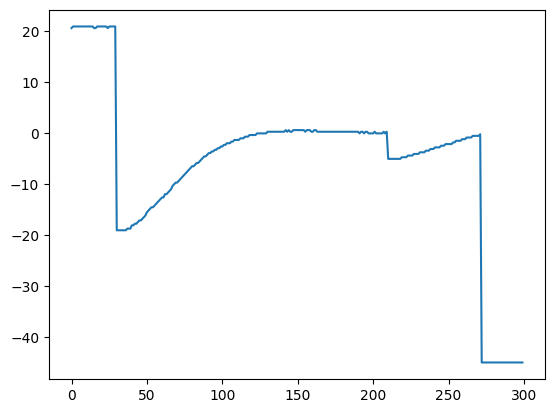

In [11]:
lstm.temp_history = 14 * [Tsp[0]]
lstm.err_history = 14 * [0]

Q2 = np.zeros(int(run_time))
Q2[start_anom:] = 80

tm, T1, Qlstm, Qpid = fn.run_tclab(run_time, Tsp, lstm, passive_cont=pid, Q2=Q2, emulator=True, speedup=60)

fn.make_image_history('./figures/heater_anom_{}.png', len(tm), 10, {
    'SP $(^oC)$': Tsp,
    '$T_1$ $(^oC)$': T1,
    '$Q_{PID}$ (%)': Qpid,
    '$Q_{LSTM}$ (%)': Qlstm
})
images = fn.read_image_history('./figures/heater_anom_{}.png', len(tm), 10)
imageio.mimsave('heater_anomaly.gif', images)
err = T1 - Tsp
plt.plot(err)

TCLab version 0.4.9
Simulated TCLab
1/1 [==============================] - 0s 14ms/step
   0.0  20.63   0.00   0.00
1/1 [==============================] - 0s 13ms/step
   3.3  20.95   0.00   0.00
1/1 [==============================] - 0s 15ms/step
   5.2  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
   6.2  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
   7.1  20.95   0.00   0.00
1/1 [==============================] - 0s 13ms/step
   8.2  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  10.2  20.63   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  12.1  20.63   0.00   0.00
1/1 [==============================] - 0s 13ms/step
  13.1  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  14.2  20.95   0.00   0.00
1/1 [==============================] - 0s 13ms/step
  15.0  20.95   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  16.1  20.63   0.00   0.00
1/1 

1/1 [==============================] - 0s 14ms/step
 121.2  38.35  42.79 100.00
1/1 [==============================] - 0s 14ms/step
 122.1  38.35  42.07 100.00
1/1 [==============================] - 0s 14ms/step
 123.2  38.35  41.52 100.00
1/1 [==============================] - 0s 13ms/step
 124.1  38.68  40.66 100.00
1/1 [==============================] - 0s 14ms/step
 125.0  38.68  40.04 100.00
1/1 [==============================] - 0s 14ms/step
 126.2  38.68  39.59 100.00
1/1 [==============================] - 0s 14ms/step
 127.1  39.00  38.81 100.00
1/1 [==============================] - 0s 13ms/step
 128.0  39.00  38.27 100.00
1/1 [==============================] - 0s 14ms/step
 129.2  39.00  37.85 100.00
1/1 [==============================] - 0s 14ms/step
 130.0  39.32  37.12 100.00
1/1 [==============================] - 0s 14ms/step
 131.2  39.32  36.58 100.00
1/1 [==============================] - 0s 14ms/step
 132.1  39.32  36.17 100.00
1/1 [==============================] - 0

1/1 [==============================] - 0s 14ms/step
  22.2  38.68   0.00   0.00
1/1 [==============================] - 0s 13ms/step
  23.1  38.68   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  24.0  38.68   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  25.2  38.68   0.00   0.00
1/1 [==============================] - 0s 13ms/step
  26.1  38.35   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  27.0  38.35   0.00   0.00
1/1 [==============================] - 0s 15ms/step
  28.1  38.35   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  30.2  38.03   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  31.1  38.03   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  32.2  38.03   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  33.1  37.71   0.00   0.00
1/1 [==============================] - 0s 14ms/step
  34.0  37.71   3.71 100.00
1/1 [==============================] - 0

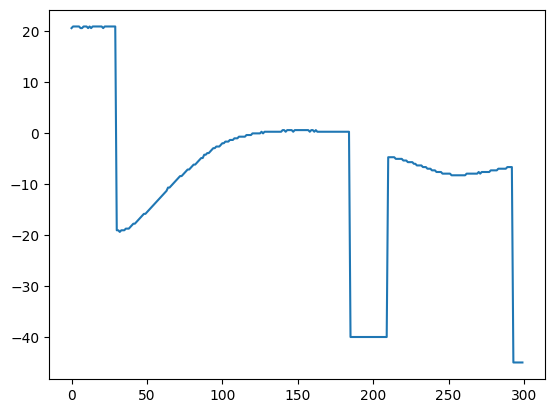

In [25]:
lstm.temp_history = 14 * [Tsp[0]]
lstm.err_history = 14 * [0]

TCLab = tclab.setup(connected=False, speedup=60)
with TCLab() as lab:
    tm1, T11, Qlstm1, Qpid1 = fn.resume_run(lab, start_anom, Tsp, lstm, passive_cont=pid, emulator=True, speedup=60)
    pid.kp = 3.0 * pid.kp
    pid.ki = 0.5 * pid.ki
    pid.kd = pid.kd + 2
    tm2, T12, Qlstm2, Qpid2 = fn.resume_run(lab, run_time - start_anom, Tsp, lstm, passive_cont=pid, emulator=True, speedup=60)
    tm = np.append(tm1, [tm2[i] + tm1[-1] for i in range(len(tm2))])
    T1, Qlstm, Qpid = np.append(T11, T12), np.append(Qlstm1, Qlstm2), np.append(Qpid1, Qpid2)

fn.make_image_history('./figures/pid_anom_{}.png', len(tm), 10, {
    'SP $(^oC)$': Tsp,
    '$T_1$ $(^oC)$': T1,
    '$Q_{PID}$ (%)': Qpid,
    '$Q_{LSTM}$ (%)': Qlstm
})
images = fn.read_image_history('./figures/pid_anom_{}.png', len(tm), 10)
imageio.mimsave('heater_anomaly.gif', images)
err = T1 - Tsp
plt.plot(err)